<a href="https://colab.research.google.com/github/trailrun/ML_books/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# SVR

import numpy as np
import matplotlib.pyplot as plt

X = np.sort(5*np.random.rand(40,1), axis=0)
y = np.sin(X).ravel()

print(X[0:6], '\n\n', y[0:20])

[[0.23613422]
 [0.3094352 ]
 [0.31090515]
 [0.34841673]
 [0.42868094]
 [0.44458679]] 

 [0.23394588 0.30452071 0.30592051 0.3414101  0.41567146 0.43008488
 0.49543575 0.57951205 0.66757551 0.78395089 0.80390943 0.87164014
 0.90830226 0.9153799  0.94204377 0.9527888  0.97227961 0.99292547
 0.99327894 0.99718433]


In [18]:
y[::5] += 3*(0.5 - np.random.rand(8))
print(y[0:10])

[ 0.46897616  0.30452071  0.30592051  0.3414101   0.41567146 -0.70546389
  0.49543575  0.57951205  0.66757551  0.78395089]


In [19]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1) #랜덤포레스트
svr_lin = SVR(kernel='linear', C=100, gamma='auto') #선형회귀
svr_poly = SVR(kernel='poly', C=100, gamma='auto',degree=3, epsilon=0.1, coef0=1) #다항회귀

svr_rbf.fit(X, y)
svr_lin.fit(X, y)
svr_poly.fit(X, y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [20]:
rbf_pred = svr_rbf.predict(X)
lin_pred = svr_lin.predict(X)
poly_pred = svr_poly.predict(X)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random_Forest', 'Linaer', 'Polynomial']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index=kernel, columns=evls)
for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)

    results.loc[nm]['mse'] = round(mse, 2)
    results.loc[nm]['rmse'] = round(rmse, 2)
    results.loc[nm]['mae'] = round(mae, 2)

results



,mse,rmse,mae
Random_Forest,0.14,0.37,0.19
Linaer,0.36,0.6,0.46
Polynomial,0.14,0.38,0.2


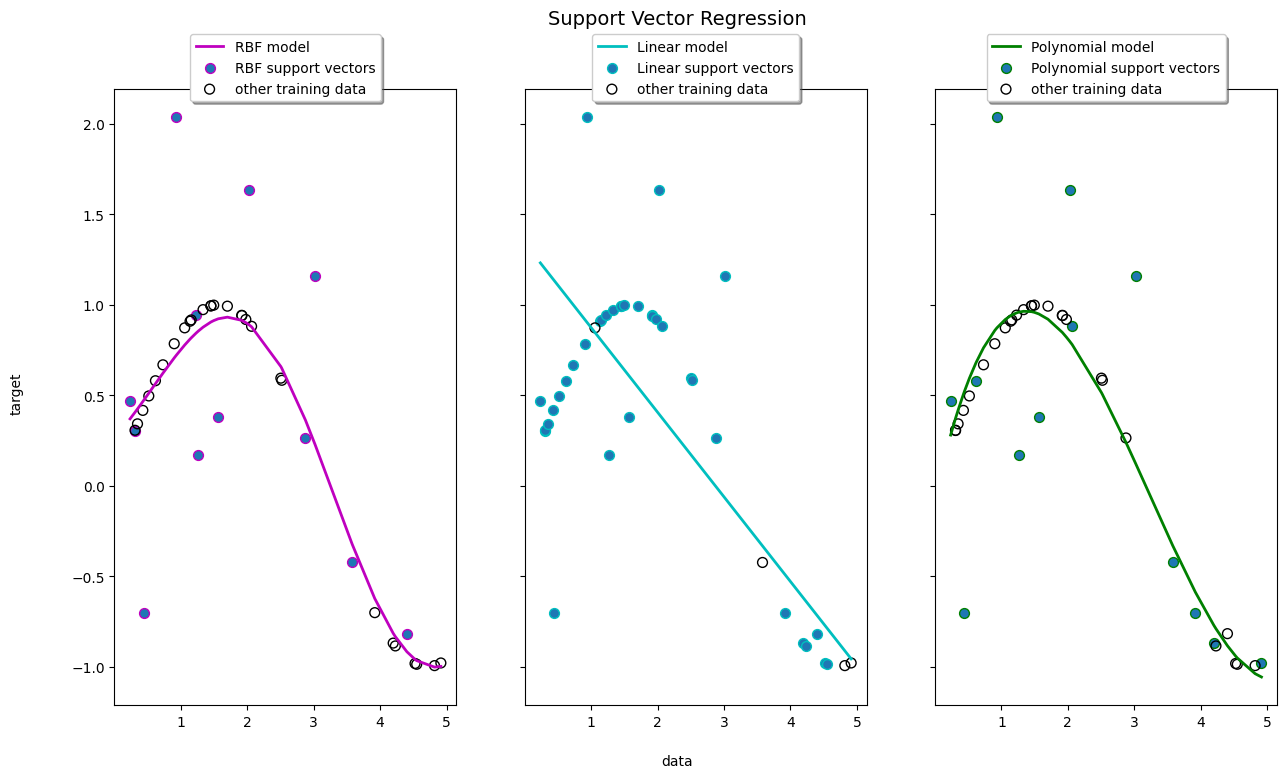

In [44]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label = '{} model'.format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor=None,
        edgecolor=model_color[ix],
        s=50,
        label='{} support vectors'.format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor='none',
        edgecolor='k',
        s=50,
        label='other training data',
    )
    axes[ix].legend(
        loc='upper center',
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle('Support Vector Regression', fontsize=14)
plt.show()
